<a href="https://colab.research.google.com/github/CienciaDatosUdea/002_EstudiantesAprendizajeEstadistico/blob/main/semestre2024-2/Sesiones/Sesion_10_EspecificidadSensibilidadROC_v1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sensibilidad y Especificidad

## Sensibilidad
La **sensibilidad** es una medida del desempeño de una prueba o sistema de clasificación para detectar correctamente los casos positivos en un conjunto de datos. En términos generales, evalúa la capacidad de identificar correctamente los elementos que pertenecen a una categoría específica (por ejemplo, sujetos enfermos, eventos relevantes, u objetos clasificados como positivos).

Responde a la pregunta: _¿Cuál es la probabilidad de que el sistema clasifique correctamente un caso como positivo cuando realmente pertenece a la categoría de interés?_

Matemáticamente, se define como la proporción de verdaderos positivos (VP) respecto al total de casos que realmente son positivos, incluyendo tanto los verdaderos positivos como los falsos negativos (FN):

\begin{equation}
S = \frac{\text{Verdaderos Positivos (VP)}}{\text{Total de Casos Positivos}} = \frac{\text{VP}}{\text{VP} + \text{FN}}
\end{equation}

Una sensibilidad alta indica que la prueba es efectiva para identificar correctamente la categoría positiva, minimizando los falsos negativos.

---

## Especificidad
La **especificidad** es una medida del desempeño de una prueba o sistema de clasificación para detectar correctamente los casos negativos en un conjunto de datos. Evalúa la capacidad de identificar correctamente los elementos que no pertenecen a la categoría específica (por ejemplo, sujetos sanos, eventos no relevantes, u objetos clasificados como negativos).

Responde a la pregunta: _¿Cuál es la probabilidad de que el sistema clasifique correctamente un caso como negativo cuando realmente no pertenece a la categoría de interés?_

Matemáticamente, se define como la proporción de verdaderos negativos (VN) respecto al total de casos que realmente son negativos, incluyendo tanto los verdaderos negativos como los falsos positivos (FP):

\begin{equation}
E = \frac{\text{Verdaderos Negativos (VN)}}{\text{Total de Casos Negativos}} = \frac{\text{VN}}{\text{VN} + \text{FP}}
\end{equation}


Una especificidad alta indica que la prueba es efectiva para identificar correctamente la categoría negativa, minimizando los falsos positivos.

---

## Aplicación General
Estas métricas son ampliamente utilizadas en múltiples dominios, como:

- Diagnósticos médicos (enfermos y sanos).
- Sistemas de clasificación automática (spam y no spam, fraude y no fraude).
- Reconocimiento de patrones (presencia o ausencia de un objeto o característica).
- Evaluación de modelos predictivos en ciencia de datos.

Ambas métricas son complementarias: mientras que la sensibilidad se enfoca en minimizar los casos positivos que se escapan (falsos negativos), la especificidad se enfoca en minimizar los casos negativos incorrectamente identificados como positivos (falsos positivos). Juntas, ayudan a evaluar la efectividad global de un sistema de clasificación.


In [ ]:
import sklearn
import numpy as np
import pandas as pd
import matplotlib.pylab as plt
import seaborn as sns
from scipy import stats
from scipy import optimize
from scipy.stats import norm

In [ ]:
def pdf(x, mean1 = 10, mean2=16, desv1=2, desv2=2):
  fig, ax = plt.subplots(1, 1)

  f1 = stats.norm(loc = mean1, scale = desv1)
  f2 = stats.norm(loc = mean2, scale = desv2)
  ax.plot(x, f1.pdf(x),'g-', lw = 3, alpha = 0.6, label='pdf 1, sanos')
  ax.plot(x, f2.pdf(x),'b-', lw = 3, alpha = 0.6, label='pdf 2, enfermos')
  ax.set_xlabel("x")
  ax.set_ylabel("PDF(X)")
  return "Done", f1, f2

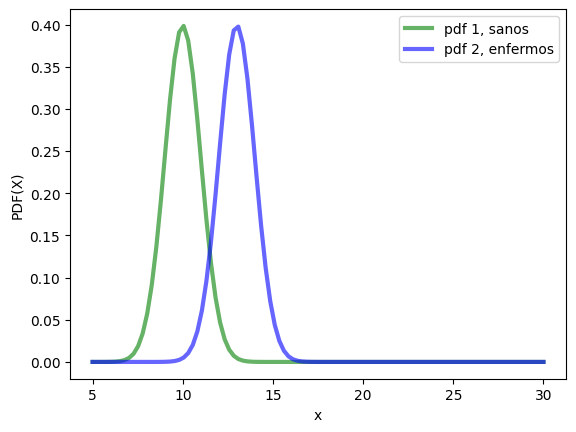

In [ ]:
x = np.linspace(5, 30,100)
_, f1, f2 = pdf(x, mean1 = 10, mean2 = 13, desv1 = 1, desv2 = 1)
plt.legend()

In [ ]:
random_1 = f1.rvs(1000)
random_2 = f2.rvs(1000)

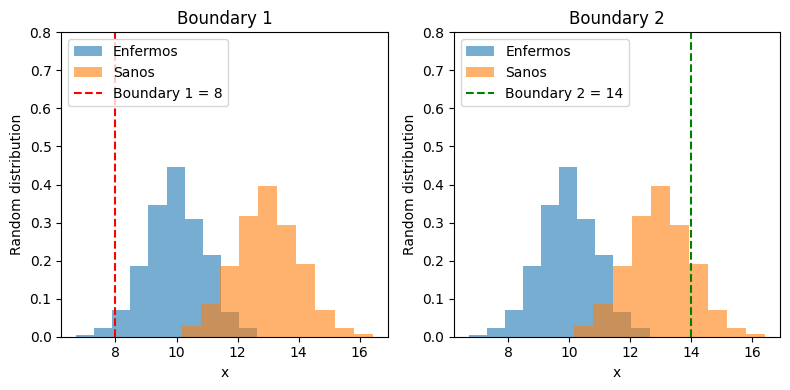

In [ ]:
# Definir boundaries
boundary1 = 8
boundary2 = 14

# Crear los subplots
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Subplot 1: Boundary 1
axs[0].hist(random_1, density=True, alpha=0.6, label="Sanos")
axs[0].hist(random_2, density=True, alpha=0.6, label="Enfermos")
axs[0].vlines(boundary1, 0, 2*0.45, color='red', linestyle='--', label=f"Boundary 1 = {boundary1}")
axs[0].set_ylim(0, 0.8)
axs[0].set_title("Boundary 1")
axs[0].legend(loc=2)
axs[0].set_xlabel("x")
axs[0].set_ylabel("Random distribution")

# Subplot 2: Boundary 2
axs[1].hist(random_1, density=True, alpha=0.6, label="Sanos")
axs[1].hist(random_2, density=True, alpha=0.6, label="Enfermos")
axs[1].vlines(boundary2, 0, 2*0.45, color='green', linestyle='--', label=f"Boundary 2 = {boundary2}")
axs[1].set_ylim(0, 0.8)
axs[1].set_title("Boundary 2")
axs[1].legend(loc=2)
axs[1].set_xlabel("x")
axs[1].set_ylabel("Random distribution")

# Mostrar los gráficos
plt.tight_layout()
plt.show()


# Matriz Confusión


La **matriz de confusión** es una herramienta utilizada en la evaluación de modelos de clasificación. Es una tabla que permite visualizar el desempeño de un modelo clasificando instancias en diferentes categorías, comparando las predicciones realizadas por el modelo con los valores reales.

## Estructura de la Matriz de Confusión
Para un problema de clasificación binaria, la matriz de confusión se organiza de la siguiente manera:

| **Predicción / Real** | **Positivo Real** | **Negativo Real** |
|------------------------|-------------------|-------------------|
| **Positivo Predicho**  | Verdaderos Positivos (VP) | Falsos Positivos (FP) |
| **Negativo Predicho**  | Falsos Negativos (FN) | Verdaderos Negativos (VN) |

|||||
|-|-|-|-|
| |1|0|-|
|1|VP|FP|-|
|0|FN|VN|-|

1. **Verdaderos Positivos (VP):** Número de casos predichos como positivos que realmente son positivos.  
2. **Falsos Positivos (FP):** Número de casos predichos como positivos que en realidad son negativos (error tipo I).  
3. **Falsos Negativos (FN):** Número de casos predichos como negativos que en realidad son positivos (error tipo II).  
4. **Verdaderos Negativos (VN):** Número de casos predichos como negativos que realmente son negativos.


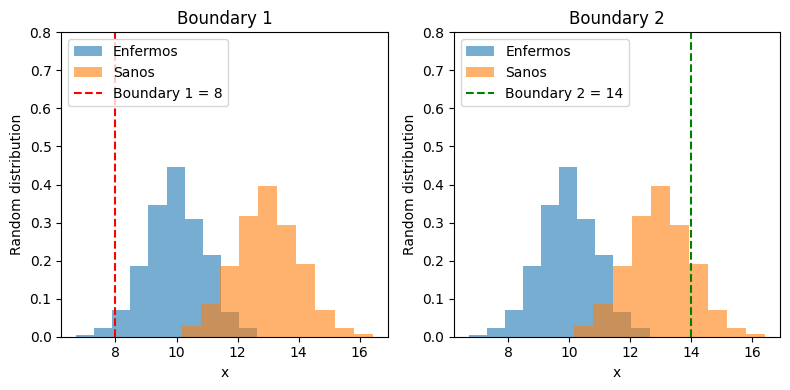

In [ ]:
boundary=10
VP = random_2>boundary   # predice 1 y es 1 enfermos
VN = random_1<boundary   # predice 0 y es 0 sanos

FP = random_1>boundary   # predice 1 y es 0, predice enfermo y es sano
FN = random_2<boundary  # predice 0 y es 1, predice sano y es enfermo

# prompt: mostrar una matriz con vp, vn, fp, fn

# Crear la matriz de confusión como un DataFrame de pandas
confusion_matrix = pd.DataFrame({
    'Real Positivo': [VP.sum(), FN.sum()],
    'Real Negativo': [FP.sum(), VN.sum()]
}, index=['Predicho Positivo', 'Predicho Negativo'])

confusion_matrix

,Real Positivo,Real Negativo
Predicho Positivo,532,0
Predicho Negativo,468,1000


In [ ]:
import plotly.graph_objects as go

boundary_range = np.arange(10, 16, 0.5)

# Inicializar listas para almacenar resultados
boundaries = []
vp_values = []
vn_values = []
fp_values = []
fn_values = []

# Calcular métricas para cada boundary
for boundary in boundary_range:
    VP = (random_2 > boundary)  # predice 1 y es 1
    VN = (random_1 < boundary)  # predice 0 y es 0
    FP = (random_1 > boundary)  # predice 1 y es 0
    FN = (random_2 < boundary)  # predice 0 y es 1

    boundaries.append(boundary)
    vp_values.append(VP.sum())
    vn_values.append(VN.sum())
    fp_values.append(FP.sum())
    fn_values.append(FN.sum())

# Crear DataFrame con los resultados
results_df = pd.DataFrame({
    'Boundary': boundaries,
    'VP (Verdaderos Positivos)': vp_values,
    'VN (Verdaderos Negativos)': vn_values,
    'FP (Falsos Positivos)': fp_values,
    'FN (Falsos Negativos)': fn_values
})

# Crear gráfico interactivo
fig = go.Figure()

# Añadir líneas para cada métrica
fig.add_trace(go.Scatter(x=results_df['Boundary'], y=results_df['VP (Verdaderos Positivos)'],
                         mode='lines+markers', name='VP (Verdaderos Positivos)'))
fig.add_trace(go.Scatter(x=results_df['Boundary'], y=results_df['VN (Verdaderos Negativos)'],
                         mode='lines+markers', name='VN (Verdaderos Negativos)'))
fig.add_trace(go.Scatter(x=results_df['Boundary'], y=results_df['FP (Falsos Positivos)'],
                         mode='lines+markers', name='FP (Falsos Positivos)'))
fig.add_trace(go.Scatter(x=results_df['Boundary'], y=results_df['FN (Falsos Negativos)'],
                         mode='lines+markers', name='FN (Falsos Negativos)'))

# Configurar diseño del gráfico
fig.update_layout(
    title='Efecto del Boundary en la Matriz de Confusión',
    xaxis_title='Boundary',
    yaxis_title='Cantidad',
    legend_title='Métricas',
    template='plotly_white'
)

# Mostrar el gráfico interactivo
fig.show()

# Especificidad:

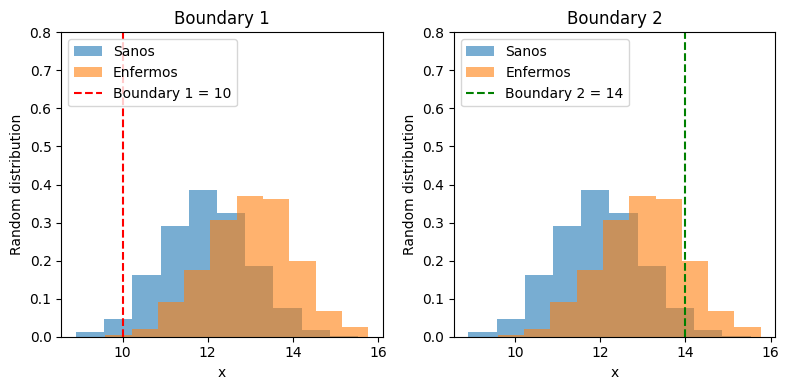

In [ ]:
# @title frontera

# Definir boundaries
boundary1 = 10
boundary2 = 14

# Crear los subplots
fig, axs = plt.subplots(1, 2, figsize=(8, 4))

# Subplot 1: Boundary 1
axs[0].hist(random_1, density=True, alpha=0.6, label="Sanos")
axs[0].hist(random_2, density=True, alpha=0.6, label="Enfermos")
axs[0].vlines(boundary1, 0, 2*0.45, color='red', linestyle='--', label=f"Boundary 1 = {boundary1}")
axs[0].set_ylim(0, 0.8)
axs[0].set_title("Boundary 1")
axs[0].legend(loc=2)
axs[0].set_xlabel("x")
axs[0].set_ylabel("Random distribution")

# Subplot 2: Boundary 2
axs[1].hist(random_1, density=True, alpha=0.6, label="Sanos")
axs[1].hist(random_2, density=True, alpha=0.6, label="Enfermos")
axs[1].vlines(boundary2, 0, 2*0.45, color='green', linestyle='--', label=f"Boundary 2 = {boundary2}")
axs[1].set_ylim(0, 0.8)
axs[1].set_title("Boundary 2")
axs[1].legend(loc=2)
axs[1].set_xlabel("x")
axs[1].set_ylabel("Random distribution")

# Mostrar los gráficos
plt.tight_layout()
plt.show()


Probabilidad de identificar como sanos a los que realmente lo son.

$E = \frac{VN}{VN+FP}$

In [ ]:
boundary = 13
VN = (random_1<boundary).sum()
FP = (random_1>boundary).sum()
E = VN/(VN+FP)
E

0.842

# Sensibilidad ó Recall

Probabilidad de que la prueba indentifique como enfermo aquel que realmente esta

$S = \frac{VP}{VP+FN}$

In [ ]:
boundary = 11

VP = (random_2>boundary).sum()
FN = (random_2<boundary).sum()
S = VP/(VP+FN)
S

0.982

# Exactitud(Accuracy)

$\frac{(VP+VN)}{(VP+FP+FN+VN)}$



In [ ]:
VP = (random_2>boundary).sum()
VN = (random_1<boundary).sum()
FP = (random_1>boundary).sum()
FN = (random_2<boundary).sum()
n1=VP+VN
n2=FP+FN
exactitud = (VP+VN)/(n1+n2)
exactitud

0.5815

# Presicion (Presición)

$\frac{VP}{VP+FP}$



In [ ]:
presicion=VP/(VP+FP)
presicion

0.5452526374236535

# F1 score

El F1 score es una medida que combina la precisión y el recall de un clasificador binario, es decir, un modelo que predice si una muestra pertenece o no a una clase determinada. El F1 score se calcula como la media armónica de la precisión y el recall, y tiene un valor entre 0 y 1. Un F1 score alto indica que el clasificador tiene un buen equilibrio entre la precisión y el recall, es decir, que minimiza los falsos positivos y los falsos negativos

In [ ]:
F1 = 2*presicion*S/(presicion+S)
F1

0.6713757147662294

Para diferentes fronteras como es la sensiblidad como funcion de la especificidad 1-E.
Curvas Roc https://es.wikipedia.org/wiki/Curva_ROC

In [ ]:
boundary_=np.linspace(2,20,100)
E_=[]
S_=[]
F1_=[]
for b in boundary_:
  VN = (random_1<b).sum()
  FP = (random_1>b).sum()
  E = VN/(VN+FP)
  E_.append(E)

  VP = (random_2>b).sum()
  FN = (random_2<b).sum()
  S = VP/(VP+FN)
  S_.append(S)

In [ ]:
np.array(S_)

array([1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 1.   ,
       1.   , 1.   , 1.   , 1.   , 1.   , 1.   , 0.999, 0.999, 0.999,
       0.999, 0.996, 0.994, 0.993, 0.984, 0.974, 0.955, 0.927, 0.901,
       0.877, 0.834, 0.793, 0.736, 0.675, 0.612, 0.549, 0.482, 0.414,
       0.348, 0.287, 0.218, 0.155, 0.113, 0.089, 0.054, 0.037, 0.026,
       0.018, 0.009, 0.003, 0.001, 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   , 0.   ,
       0.   ])

Text(0, 0.5, 'S')

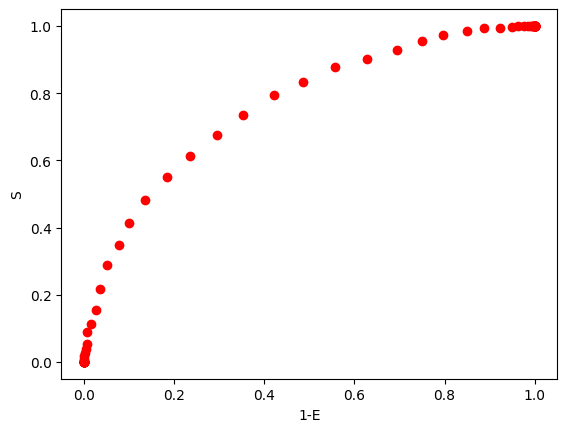

In [ ]:
plt.plot( (1-np.array(E_)), np.array(S_),"ro")
plt.xlabel("1-E")
plt.ylabel("S")

# Sensibilidad(Recall)

Probabilidad de que la prueba indentifique como enfermo aquel que realmente esta

$S = \frac{VP}{VP+FN}$

# Presicion (Presicion)

$P=\frac{VP}{VP+FP}$



In [ ]:
# Importar librerías
import numpy as np
import sklearn.datasets
import sklearn.model_selection
import sklearn.ensemble
import sklearn.metrics
import matplotlib.pyplot as plt
import seaborn as sns

# Generar el conjunto de datos make_moons
X, y = sklearn.datasets.make_moons(n_samples=1000, noise=0.3, random_state=42)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar un modelo de random forest
rf = sklearn.ensemble.RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)


RandomForestClassifier(random_state=42)

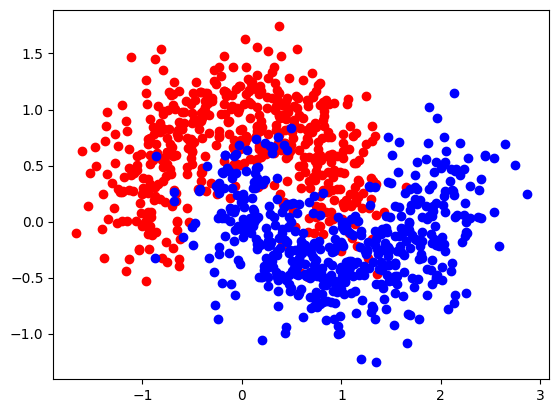

In [ ]:
X, y = sklearn.datasets.make_moons(n_samples=1000, noise=0.3, random_state=42)
plt.plot(X[:,0][y==0], X[:,1][y==0],"ro")
plt.plot(X[:,0][y==1], X[:,1][y==1],"bo")

In [ ]:
# Obtener las probabilidades estimadas de la clase positiva
y_score = rf.predict_proba(X_test)[:, 1]
y_score

array([0.97, 0.19, 1.  , 0.02, 1.  , 1.  , 0.35, 0.07, 0.97, 0.07, 0.38,
       0.98, 0.05, 1.  , 0.  , 0.98, 1.  , 0.  , 0.99, 0.  , 0.09, 0.09,
       0.69, 0.  , 0.14, 0.58, 0.17, 0.01, 0.01, 0.91, 0.71, 0.11, 0.56,
       1.  , 0.01, 0.96, 0.42, 0.83, 1.  , 1.  , 0.89, 0.89, 1.  , 0.  ,
       0.34, 0.98, 0.02, 0.  , 0.98, 0.99, 0.33, 0.01, 0.15, 0.  , 0.75,
       0.03, 0.85, 0.86, 0.81, 0.  , 1.  , 0.3 , 0.38, 0.95, 1.  , 1.  ,
       0.98, 0.14, 0.16, 0.02, 0.98, 0.  , 0.24, 0.81, 0.48, 0.98, 1.  ,
       0.77, 0.  , 0.  , 0.52, 0.97, 0.  , 0.98, 0.92, 0.24, 0.  , 0.01,
       0.  , 0.05, 0.98, 0.95, 0.97, 1.  , 1.  , 0.  , 1.  , 0.84, 0.  ,
       1.  , 0.  , 0.02, 0.94, 0.87, 0.  , 0.01, 0.95, 0.11, 0.  , 0.86,
       1.  , 0.93, 0.26, 0.92, 0.99, 0.06, 0.75, 0.01, 1.  , 0.29, 0.63,
       0.01, 0.07, 1.  , 0.98, 0.01, 1.  , 0.97, 0.02, 0.98, 0.97, 0.72,
       0.99, 0.08, 0.  , 0.05, 1.  , 0.36, 0.  , 1.  , 0.  , 0.  , 0.07,
       0.35, 0.  , 0.  , 0.95, 0.  , 0.91, 0.01, 0.

In [ ]:
# Calcular la matriz de confusión
cm = sklearn.metrics.confusion_matrix(y_test, rf.predict(X_test))
cm

array([[145,  11],
       [ 15, 129]])

In [ ]:
# Calcular los valores de TPR y FPR para diferentes umbrales
fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_test, y_score)
thresholds

array([2.  , 1.  , 0.99, 0.98, 0.97, 0.96, 0.95, 0.93, 0.92, 0.91, 0.9 ,
       0.89, 0.88, 0.87, 0.86, 0.85, 0.84, 0.83, 0.82, 0.81, 0.77, 0.75,
       0.73, 0.72, 0.64, 0.63, 0.61, 0.52, 0.48, 0.43, 0.4 , 0.36, 0.35,
       0.34, 0.33, 0.29, 0.28, 0.26, 0.25, 0.24, 0.17, 0.16, 0.15, 0.14,
       0.13, 0.11, 0.1 , 0.09, 0.08, 0.07, 0.05, 0.04, 0.03, 0.02, 0.01,
       0.  ])

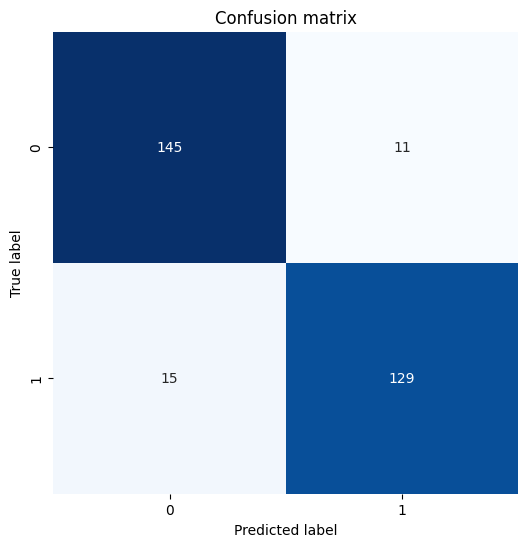

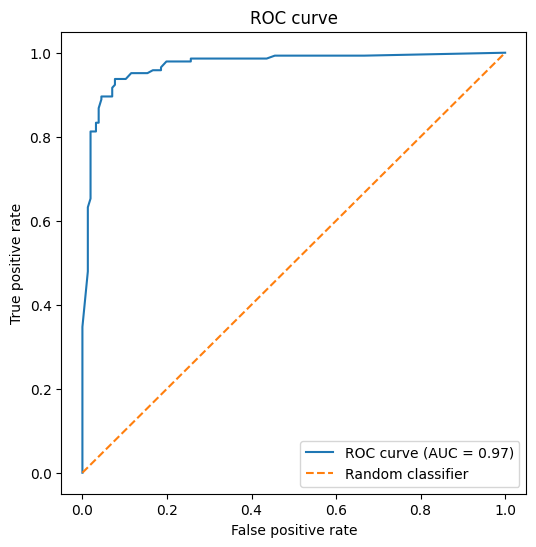

In [ ]:
# Calcular los valores de TPR y FPR para diferentes umbrales
fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_test, y_score)

# Calcular el AUC
auc = sklearn.metrics.roc_auc_score(y_test, y_score)

# Graficar la matriz de confusión
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.title('Confusion matrix')
plt.show()

# Graficar la curva ROC
plt.figure(figsize=(6, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', label='Random classifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('ROC curve')
plt.legend()
plt.show()


Para el AUC, se recomienda lo siguiente:

Un AUC cercano a 1 indica que el clasificador tiene un buen rendimiento, ya que puede distinguir bien entre las dos clases. Un AUC de 1 significa que el clasificador es perfecto, y nunca se equivoca.
Un AUC cercano a 0.5 indica que el clasificador tiene un rendimiento aleatorio, es decir, que no puede distinguir entre las dos clases. Un AUC de 0.5 significa que el clasificador es equivalente a lanzar una moneda al aire.
Un AUC cercano a 0 indica que el clasificador tiene un mal rendimiento, ya que confunde las dos clases. Un AUC de 0 significa que el clasificador es el peor posible, y siempre se equivoca.

In [ ]:
# Importar librerías
import numpy as np
import sklearn.datasets
import sklearn.model_selection
import sklearn.ensemble
import sklearn.metrics
import matplotlib.pyplot as plt

# Generar el conjunto de datos make_moons
X, y = sklearn.datasets.make_moons(n_samples=1000, noise=0.3, random_state=42)

# Dividir el conjunto de datos en entrenamiento y prueba
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, test_size=0.3, random_state=42)

# Entrenar un modelo de random forest
rf = sklearn.ensemble.RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

# Calcular el recall del modelo
recall = sklearn.metrics.recall_score(y_test, rf.predict(X_test))
print(f'Recall: {recall:.2f}')

# Buscar los mejores parámetros del modelo que maximicen el recall
param_grid = {'n_estimators': [10, 50, 100, 200], 'max_depth': [None, 5, 10, 15], 'min_samples_leaf': [1, 2, 4]}
grid_search = sklearn.model_selection.GridSearchCV(rf, param_grid, scoring='recall', cv=5)
grid_search.fit(X_train, y_train)

# Mostrar los mejores parámetros encontrados
print(f'Best parameters: {grid_search.best_params_}')

# Evaluar el rendimiento del mejor modelo encontrado
best_rf = grid_search.best_estimator_
#sklearn.metrics.plot_confusion_matrix(best_rf, X_test, y_test)
plt.show()


Recall: 0.90
Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'n_estimators': 10}


In [ ]:
grid_search = sklearn.model_selection.GridSearchCV?


In [ ]:
y_score = rf.predict_proba(X_test)[:, 1]
y_score

array([0.97, 0.19, 1.  , 0.02, 1.  , 1.  , 0.35, 0.07, 0.97, 0.07, 0.38,
       0.98, 0.05, 1.  , 0.  , 0.98, 1.  , 0.  , 0.99, 0.  , 0.09, 0.09,
       0.69, 0.  , 0.14, 0.58, 0.17, 0.01, 0.01, 0.91, 0.71, 0.11, 0.56,
       1.  , 0.01, 0.96, 0.42, 0.83, 1.  , 1.  , 0.89, 0.89, 1.  , 0.  ,
       0.34, 0.98, 0.02, 0.  , 0.98, 0.99, 0.33, 0.01, 0.15, 0.  , 0.75,
       0.03, 0.85, 0.86, 0.81, 0.  , 1.  , 0.3 , 0.38, 0.95, 1.  , 1.  ,
       0.98, 0.14, 0.16, 0.02, 0.98, 0.  , 0.24, 0.81, 0.48, 0.98, 1.  ,
       0.77, 0.  , 0.  , 0.52, 0.97, 0.  , 0.98, 0.92, 0.24, 0.  , 0.01,
       0.  , 0.05, 0.98, 0.95, 0.97, 1.  , 1.  , 0.  , 1.  , 0.84, 0.  ,
       1.  , 0.  , 0.02, 0.94, 0.87, 0.  , 0.01, 0.95, 0.11, 0.  , 0.86,
       1.  , 0.93, 0.26, 0.92, 0.99, 0.06, 0.75, 0.01, 1.  , 0.29, 0.63,
       0.01, 0.07, 1.  , 0.98, 0.01, 1.  , 0.97, 0.02, 0.98, 0.97, 0.72,
       0.99, 0.08, 0.  , 0.05, 1.  , 0.36, 0.  , 1.  , 0.  , 0.  , 0.07,
       0.35, 0.  , 0.  , 0.95, 0.  , 0.91, 0.01, 0.

In [ ]:
# Calcular los valores de TPR y FPR para diferentes umbrales

# El threshold es el valor límite que se usa para clasificar una
# muestra como positiva o negativa según el score que le asigna el modelo.
# En este caso, la función roc_curve devuelve un array de thresholds que
# corresponden a los diferentes puntos de la curva ROC, que representa la
#  relación entre la tasa de verdaderos positivos (TPR) y la tasa de falsos
# positivos (FPR) para cada umbral1. El threshold por defecto suele ser 0.5,
# pero se puede variar para ajustar el balance entre la sensibilidad y la
#  especificidad del modelo.
fpr, tpr, thresholds = sklearn.metrics.roc_curve(y_test, y_score)

# Calcular el AUC
auc = sklearn.metrics.roc_auc_score(y_test, y_score)
auc

0.9703080484330484

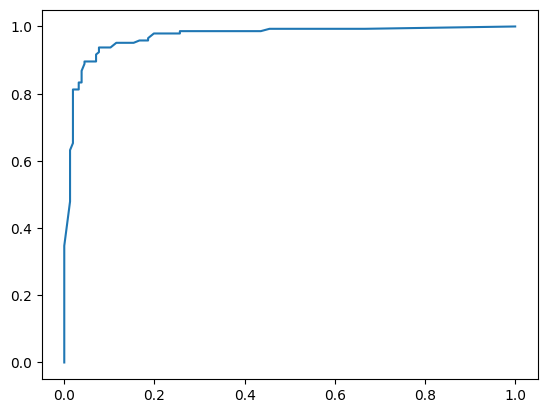

In [ ]:
plt.plot(fpr, tpr)

In [ ]:
rf = sklearn.ensemble.RandomForestClassifier?


Las probabilidades son una forma de medir la incertidumbre o la confianza que tiene un modelo sobre sus predicciones. En el caso del bosque aleatorio, las probabilidades se basan en el voto mayoritario de los árboles que lo componen. Cada árbol es un clasificador binario que asigna una etiqueta a una muestra según una serie de reglas basadas en los atributos de la muestra. El bosque aleatorio combina las predicciones de muchos árboles, cada uno entrenado con un subconjunto aleatorio de los datos, para obtener una predicción más robusta y menos propensa al sobreajuste.

Un ejemplo de cómo se calculan las probabilidades con el bosque aleatorio sería el siguiente:

Supongamos que tenemos un conjunto de datos con dos atributos (X1 y X2) y dos clases (0 y 1). Queremos predecir la clase de una nueva muestra con los valores X1 = 0.5 y X2 = 0.7. Para ello, usamos un bosque aleatorio con 5 árboles, cada uno entrenado con un subconjunto diferente de los datos. Los árboles tienen la siguiente estructura:


```python
# Árbol 1
if X1 < 0.3:
    return 0
else:
    if X2 < 0.6:
        return 0
    else:
        return 1

# Árbol 2
if X2 < 0.4:
    return 0
else:
    if X1 < 0.7:
        return 1
    else:
        return 0

# Árbol 3
if X1 < 0.5:
    return 0
else:
    return 1

# Árbol 4
if X2 < 0.8:
    return 0
else:
    return 1

# Árbol 5
if X1 < 0.6:
    return 0
else:
    if X2 < 0.5:
        return 0
    else:
        return 1

```

```python
# Árbol 1: predice la clase 1
# Árbol 2: predice la clase 1
# Árbol 3: predice la clase 0
# Árbol 4: predice la clase 0
# Árbol 5: predice la clase 1
```

Contamos el número de árboles que predicen cada clase y obtenemos que hay 3 árboles que predicen la clase 1 y 2 árboles que predicen la clase 0. La probabilidad estimada para la clase 1 es el cociente entre el número de árboles que predicen esa clase y el número total de árboles, es decir, 3 / 5 = 0.6. La probabilidad estimada para la clase 0 es el complemento de la anterior, es decir, 1 - 0.6 = 0.4. El método predict_proba devolvería un array con estos valores: [0.4, 0.6]. Si queremos obtener solo la probabilidad de la clase 1, usamos el parámetro [:, 1] para seleccionar la segunda columna del array, que en este caso sería 0.6